# Meidum Version
This is the crawler for `HypeAuditor` youtube top 1000 channels.<br>
https://hypeauditor.com/top-youtube/

In [1]:
!pip install beautifulsoup4 requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Main Function

In [2]:
def go_crawler_ith_page(i, disp_flag=False):
  # =============================================
  # 1. import libraries
  import requests
  import bs4
  from IPython import display
  import pandas as pd

  # =============================================
  # 2. get web page by request
  url = f"https://hypeauditor.com/top-youtube/{'' if i==1 else f'?p={i}'}"
  resp = requests.get(url)
  if disp_flag:
    display.display(display.HTML(resp.text))

  # =============================================
  # 3. analysis the raw website html
  #   not in here
  
  # =============================================
  # 4. get Rank data
  soup = bs4.BeautifulSoup(resp.text, "html.parser")
  
  rank_selector = "div.row-cell.rank > span"
  if disp_flag:
    ranks_raw = soup.select(rank_selector)
    print(ranks_raw)
  # output : 
  # [<span data-v-81473954="">1</span>,
  #  <span data-v-81473954="">2</span>,
  #  ....,
  #  <span data-v-81473954="">50</span>]
  
  # get innerHTML
  def select_and_get_innerHTML(selector):
    return [
      elem.encode_contents().decode()
      for elem in soup.select(selector)
    ]
  ranks = select_and_get_innerHTML(rank_selector)
  if disp_flag:
    print(ranks)
  # output:
  # ["1","2", ..., "50"]

  # =============================================
  # 5. Use similar way to get
  #    channel name, follower, country, views, likes
  names = select_and_get_innerHTML("div.contributor__name > div")
  followers = select_and_get_innerHTML("div.row-cell.subscribers")
  country = select_and_get_innerHTML("div.row-cell.audience")
  views = select_and_get_innerHTML("div.row-cell.avg-views")
  likes = select_and_get_innerHTML("div.row-cell.avg-likes")

  # =============================================
  # 6. link and category need using other approaches
  # 6.1 link
  links = [elem["href"] for elem in soup.select("a.contributor-link")]
  # 6.2 category
  categories = [
  [ 
      elem.encode_contents().decode()
      for elem in midHTML.select("div.tag__content")
    ]
    for midHTML in soup.select("div.row-cell.category")
  ]

  # =============================================
  # 7. Create DataFrame
  df = pd.DataFrame(
    dict(
      ranks=ranks,
      names=names,
      links=likes,
      categories=categories,
      followers=followers,
      country=country,
      views=views,
      likes=likes
    )
  ).set_index("ranks")
  
  return df

# First Page


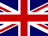
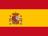
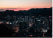
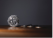
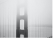
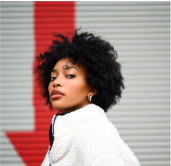
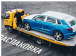
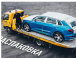
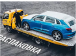
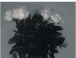
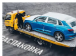
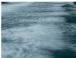
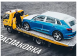
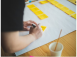
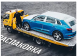
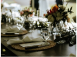
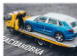
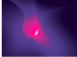

[<span data-v-81473954="">1</span>, <span data-v-81473954="">2</span>, <span data-v-81473954="">3</span>, <span data-v-81473954="">4</span>, <span data-v-81473954="">5</span>, <span data-v-81473954="">6</span>, <span data-v-81473954="">7</span>, <span data-v-81473954="">8</span>, <span data-v-81473954="">9</span>, <span data-v-81473954="">10</span>, <span data-v-81473954="">11</span>, <span data-v-81473954="">12</span>, <span data-v-81473954="">13</span>, <span data-v-81473954="">14</span>, <span data-v-81473954="">15</span>, <span data-v-81473954="">16</span>, <span data-v-81473954="">17</span>, <span data-v-81473954="">18</span>, <span data-v-81473954="">19</span>, <span data-v-81473954="">20</span>, <span data-v-81473954="">21</span>, <span data-v-81473954="">22</span>, <span data-v-81473954="">23</span>, <span data-v-81473954="">24</span>, <span data-v-81473954="">25</span>, <span data-v-81473954="">26</span>, <span data-v-81473954="">27</span>, <span data-v-81473954="">28</span>, 

In [3]:
df_first_page = go_crawler_ith_page(
  1,
  disp_flag=True
)

In [4]:
df_first_page

,names,links,categories,followers,country,views,likes
ranks,,,,,,,
1,tseries,15K,[Music &amp; Dance],225.4M,India,332.7K,15K
2,checkgate,57.6K,[Education],143.6M,,11.1M,57.6K
3,PewDiePie,221.2K,[Animation],111.5M,United States,3.5M,221.2K
4,MrBeast6000,1.9M,"[Video games, Humor]",105.1M,United States,38M,1.9M
5,Like Nastya,21.7K,[Toys],101.4M,,4.7M,21.7K
6,✿ Kids Diana Show,21.6K,"[Animation, Toys]",101.4M,,5M,21.6K
7,WWEFanNation,4.9K,[Video games],91.1M,United States,136.6K,4.9K
8,zeemusiccompany,2.6K,[Music &amp; Dance],88.3M,India,99K,2.6K
9,Vlad and Niki,28.4K,"[Animation, Toys]",86.9M,,6.7M,28.4K


# Get All Pages

In [5]:
from multiprocessing import Pool
import pandas as pd

In [6]:
%%time
all_df_list = [
  go_crawler_ith_page(ith_page)
  for ith_page in range(1, 21)
]
df_all = pd.concat(all_df_list)

CPU times: user 4.08 s, sys: 121 ms, total: 4.2 s
Wall time: 27.9 s


In [7]:
df_all

,names,links,categories,followers,country,views,likes
ranks,,,,,,,
1,tseries,15K,[Music &amp; Dance],225.4M,India,332.7K,15K
2,checkgate,57.6K,[Education],143.6M,,11.1M,57.6K
3,PewDiePie,221.2K,[Animation],111.5M,United States,3.5M,221.2K
4,MrBeast6000,1.9M,"[Video games, Humor]",105.1M,United States,38M,1.9M
5,Like Nastya,21.7K,[Toys],101.4M,,4.7M,21.7K
...,...,...,...,...,...,...,...
996,nhstudioz,46,[],10M,India,6K,46
997,VitalyzdTv,3.4K,[Humor],10M,United States,75.8K,3.4K
998,Nickelodeon,502,"[Movies, Animation]",10M,,60.2K,502


In [8]:
df_all.to_csv("top1000.csv",sep='\t')